<a href="https://colab.research.google.com/github/IamGyal/Gyal/blob/master/TensorFlow_2_quickstart_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Source: TensorFlow 2 quickstart for beginners https://www.tensorflow.org/tutorials/quickstart/beginner

In [40]:
import tensorflow as tf

In [41]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

In [42]:
###Look at the DATA TYPES of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [43]:
###Get the SHAPE of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
###Take a look at the first image as an array
index = 10
x_train[index]
# wow = x_train[10]
# wow

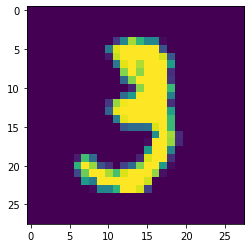

In [45]:
###Show the image as a picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[index])

In [46]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [48]:
predictions = model(x_train[:1]).numpy()  #upto first element
predictions

array([[-0.06670051,  0.02044027,  0.3929303 ,  0.49924   ,  0.8547839 ,
        -0.2526954 , -0.7587442 ,  0.25983948,  0.5138631 ,  0.713544  ]],
      dtype=float32)

In [49]:
tf.nn.softmax(predictions).numpy()

array([[0.06833072, 0.07455225, 0.10820096, 0.12033746, 0.17171633,
        0.05673348, 0.03420309, 0.09471757, 0.1221101 , 0.14909802]],
      dtype=float32)

In [50]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [51]:
loss_fn(y_train[:1], predictions).numpy()

2.8693907

In [52]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [53]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1427 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9763


In [54]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0720 - accuracy: 0.9792


[0.07204560190439224, 0.979200005531311]

In [55]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [56]:
probability_model(x_test)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.3689593e-07, 7.8483647e-10, 1.6769707e-05, ..., 9.9971765e-01,
        6.8640773e-08, 2.2700287e-06],
       [8.8490983e-09, 4.2224558e-05, 9.9995351e-01, ..., 1.2011557e-15,
        3.5352483e-09, 3.0139017e-17],
       [6.2669591e-07, 9.9836868e-01, 3.9646628e-05, ..., 1.3713234e-03,
        1.4191086e-04, 3.7184741e-06],
       ...,
       [9.3645754e-14, 2.6899291e-10, 4.9215076e-12, ..., 3.9421361e-06,
        1.0062312e-06, 2.2997534e-05],
       [2.2627603e-08, 2.6958893e-11, 1.8187268e-12, ..., 2.5949406e-08,
        1.8344290e-06, 3.8233932e-09],
       [3.3061195e-08, 5.9635907e-11, 1.5861038e-07, ..., 6.6870207e-12,
        1.0454362e-09, 3.1038678e-09]], dtype=float32)>

In [57]:
###Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving 7.jpg to 7.jpg


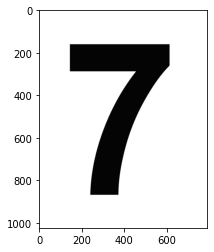

In [58]:
###show the image
new_image = plt.imread('7.jpg')
img = plt.imshow(new_image)

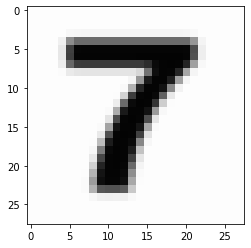

In [72]:
###Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (28,28))
img = plt.imshow(resized_image)

In [73]:
type(resized_image)

numpy.ndarray

In [71]:
# probability_model(resized_image)